# 1. Load a dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/AjStephan/curcumin/main/PubChem_compound_list.csv')

In [ ]:
data.head(10)

,cmpdname,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles,exactmass,monoisotopicmass,xlogp
0,1-Aminopropan-2-ol,75.11,46.2,5,2,2,1,CC(CN)O,75.0684,75.0684,-1.0
1,"1-Chloro-2,4-dinitrobenzene",202.55,91.6,13,0,4,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,201.9780,201.9780,2.3
2,"1,2-Dichloroethane",98.96,0.0,4,0,0,1,C(CCl)Cl,97.9690,97.9690,1.5
3,"1,2,4-Trichlorobenzene",181.40,0.0,9,0,0,0,C1=CC(=C(C=C1Cl)Cl)Cl,179.9300,179.9300,4.0
4,"2,3-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C(=C1)O)O)C(=O)O,154.0270,154.0270,1.2
5,Chloroacetaldehyde,78.50,17.1,4,0,1,1,C(C=O)Cl,77.9872,77.9872,0.3
6,2-Chloroethanol,80.51,20.2,4,1,1,1,C(CCl)O,80.0029,80.0029,-0.1
7,"2,5-Dichlorophenol",163.00,20.2,9,1,1,0,C1=CC(=C(C=C1Cl)O)Cl,161.9640,161.9640,3.1
8,"3,4-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C=C1C(=O)O)O)O,154.0270,154.0270,1.1
9,3-Cyanopyridine,104.11,36.7,8,0,2,0,C1=CC(=CN=C1)C#N,104.0370,104.0370,0.2


# 2. Clean the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22038 entries, 0 to 22037
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cmpdname          22038 non-null  object 
 1   mw                22038 non-null  float64
 2   polararea         22038 non-null  float64
 3   heavycnt          22038 non-null  int64  
 4   hbonddonor        22038 non-null  int64  
 5   hbondacc          22038 non-null  int64  
 6   rotbonds          22038 non-null  int64  
 7   isosmiles         22038 non-null  object 
 8   exactmass         22038 non-null  float64
 9   monoisotopicmass  22038 non-null  float64
 10  xlogp             21697 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.8+ MB


First we need to see if any data is missing

In [ ]:
data.isnull().sum()

cmpdname              0
mw                    0
polararea             0
heavycnt              0
hbonddonor            0
hbondacc              0
rotbonds              0
isosmiles             0
exactmass             0
monoisotopicmass      0
xlogp               341
dtype: int64

In [ ]:
numerical_data = data.drop(['cmpdname', 'isosmiles'], axis=1)

In [ ]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
numerical_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp
count,22038.000000,22038.000000,22038.000000,22038.000000,22038.000000,22038.000000,22038.000000,22038.000000,21697.000000
mean,689.007432,76.350048,48.949542,0.646928,5.315500,35.082948,688.472453,688.449523,14.961718
std,342.478529,47.373090,24.923736,1.721971,2.737998,24.394489,342.259785,342.275890,10.438526
min,4.002000,0.000000,1.000000,0.000000,0.000000,0.000000,4.002600,4.002600,-21.400000
25%,300.362500,61.800000,20.000000,0.000000,4.000000,5.000000,300.044250,300.044250,3.100000
50%,881.400000,78.900000,63.000000,0.000000,6.000000,50.000000,880.752000,880.752000,20.200000
75%,955.500000,78.900000,69.000000,0.000000,6.000000,55.000000,954.768000,954.768000,23.200000
max,2664.000000,902.000000,125.000000,29.000000,55.000000,74.000000,2659.780000,2657.790000,34.900000


In [ ]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay

df = numerical_data.dropna(axis=0)

In [ ]:
# Let's check the descriptives without the missing values
df.describe(include='all')

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp
count,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000
mean,692.712814,75.663915,49.295525,0.619901,5.295571,35.531963,692.175940,692.152925,14.961718
std,340.893131,44.287087,24.773641,1.659651,2.621649,24.298595,340.675525,340.692233,10.438526
min,12.011000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,12.000000,-21.400000
25%,302.400000,61.800000,21.000000,0.000000,5.000000,5.000000,302.188000,302.188000,3.100000
50%,883.400000,78.900000,63.000000,0.000000,6.000000,50.000000,882.768000,882.768000,20.200000
75%,955.600000,78.900000,69.000000,0.000000,6.000000,55.000000,954.898000,954.898000,23.200000
max,1793.100000,873.000000,125.000000,29.000000,52.000000,74.000000,1790.560000,1790.560000,34.900000


---

In [ ]:
df.head()

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp
0,75.11,46.2,5,2,2,1,75.0684,75.0684,-1.0
1,202.55,91.6,13,0,4,0,201.9780,201.9780,2.3
2,98.96,0.0,4,0,0,1,97.9690,97.9690,1.5
3,181.40,0.0,9,0,0,0,179.9300,179.9300,4.0
4,154.12,77.8,11,3,4,1,154.0270,154.0270,1.2


In [ ]:
df.shape

(21697, 9)

#3. Plot correlation matrix

In [ ]:

df_new = df.drop(['xlogp','exactmass', 'monoisotopicmass'],axis=1)
df_new


,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds
0,75.11,46.2,5,2,2,1
1,202.55,91.6,13,0,4,0
2,98.96,0.0,4,0,0,1
3,181.40,0.0,9,0,0,0
4,154.12,77.8,11,3,4,1
...,...,...,...,...,...,...
22032,1030.30,242.0,73,4,16,11
22033,843.10,195.0,59,4,16,11
22035,432.50,116.0,31,1,8,7
22036,749.90,194.0,52,2,10,8


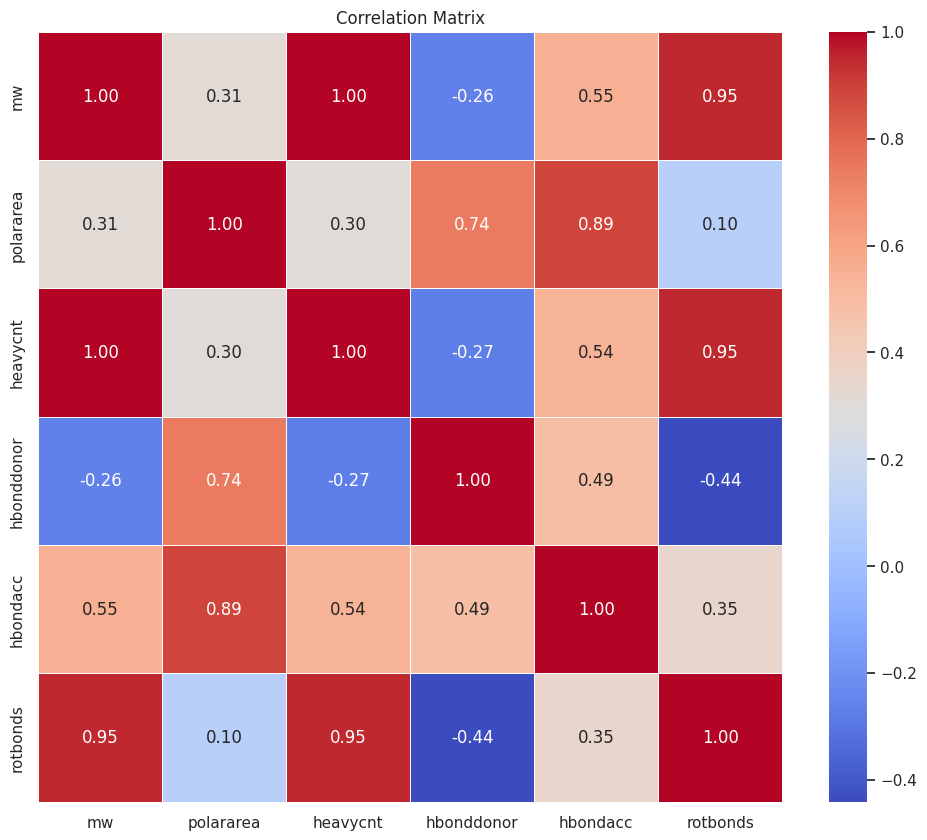

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Create the correlation matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

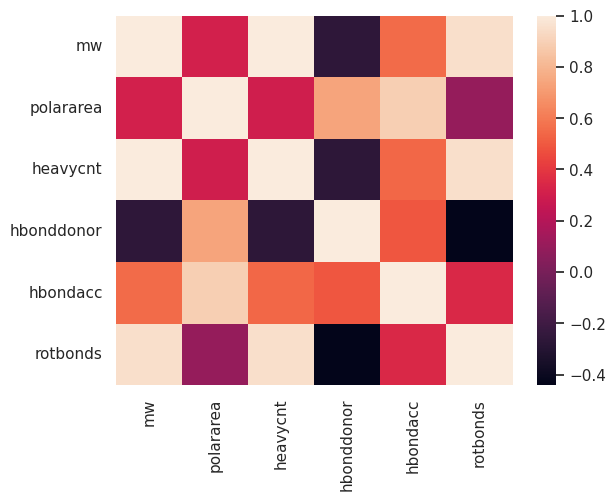

In [ ]:
import seaborn as sns

sns.heatmap(df_new.corr());

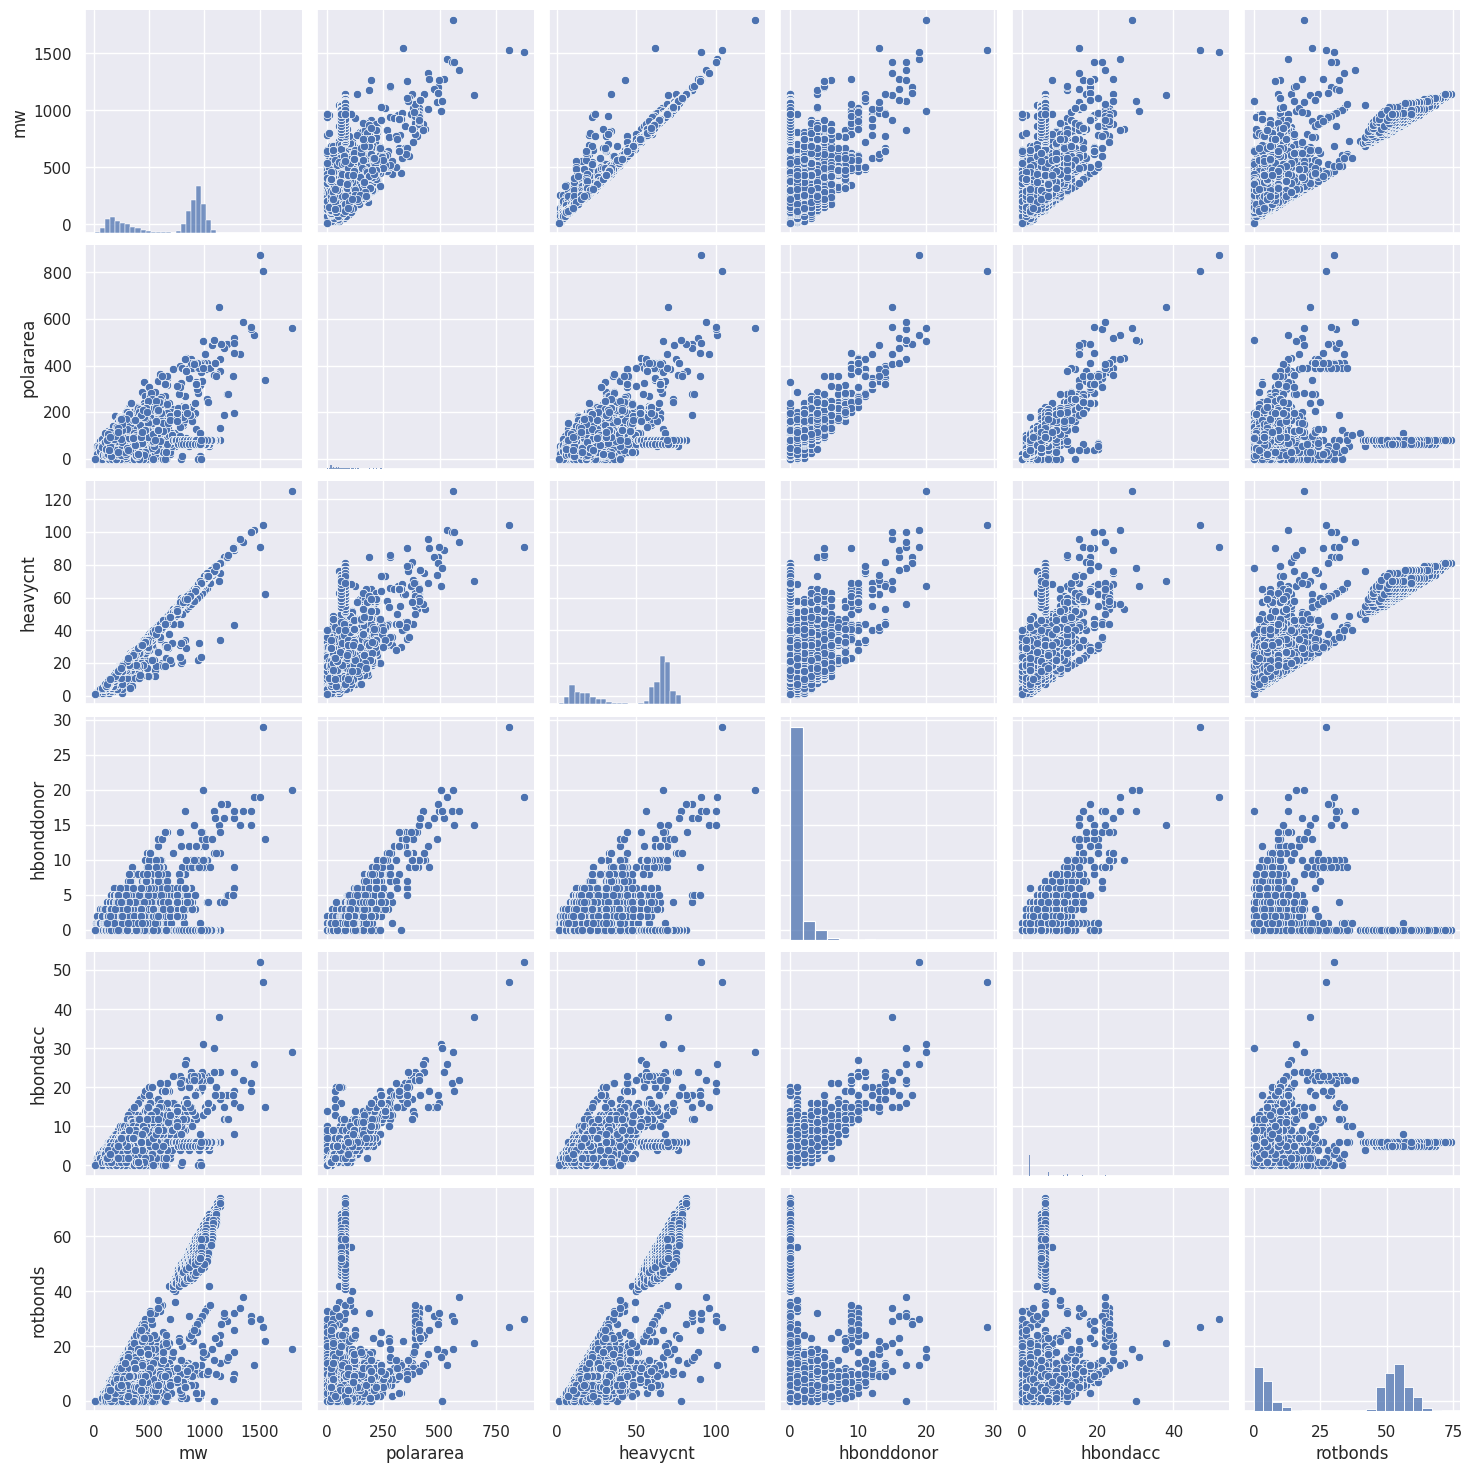

In [ ]:
sns.pairplot(df_new);

# 4. Run the regression




### Defining the variables and splitting the data

In [ ]:
rand_state = 1000

In [ ]:
y = df['xlogp']
X = df.drop('xlogp', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

## Random Forest Regression with Sklearn

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)

In [ ]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

# 5. Display the evaluation metrics



---
## Evaluating the model performance on test data

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import seaborn as sns

# Define the models
model = [
    ('Random Forest', RandomForestRegressor())
]
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

#sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
#sns.lineplot(x=y_test, y=y_test)

#plt.xlabel('Actual price', fontsize=14)
#plt.ylabel('Prediced  price', fontsize=14)
#plt.title('Actual vs Predicted  price (test set)', fontsize=17)
#plt.show()

In [ ]:
np.round(RF_regression.score(X_test, y_test),4)

In [ ]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

In [ ]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

---

#6. Tuning hyperparameters:
### Gridsearch


In [ ]:
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [ ]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   3.2s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 500}

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=500,
                      random_state=1000)

In [ ]:
y_hat_optimized = grid.predict(X_test)

In [ ]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
2018,3.8,2.882000,2.928213
8074,19.8,19.884310,19.885558
14797,24.6,24.867092,24.868447
809,0.1,1.084900,1.045388
15454,20.7,20.852640,20.850596


Mean Squared Error (MSE): 0.3018189844899033
Mean Absolute Error (MAE): 0.286305358363018
R-squared (R2) Score: 0.9972431207094745
Explained Variance Score: 0.9972456704051196



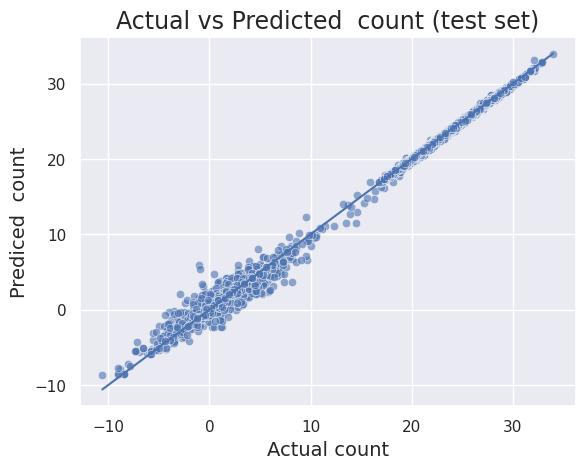

In [ ]:
# Define the models
models = [
    ('Random Forest', RandomForestRegressor())
]

sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)

# Menampilkan hasil metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

#sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
#sns.lineplot(x=y_test, y=y_test)

#plt.xlabel('Actual price', fontsize=14)
#plt.ylabel('Prediced  price', fontsize=14)
#plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
#plt.show()

In [ ]:
np.round(grid.score(X_test, y_test),4)

0.9972

In [ ]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
MSE_test_opt

0.3

In [ ]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.55

#### Cross validation
We will use Cross validation to estimate performance metrics in the test set.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [ ]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.9963

---

#7. Feature selection

---

### Feature Importance

In [ ]:
features = list(X_train.columns)
features

['mw',
 'polararea',
 'heavycnt',
 'hbonddonor',
 'hbondacc',
 'rotbonds',
 'exactmass',
 'monoisotopicmass']

In [ ]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [ ]:
importance = RF_Regressor.feature_importances_
importance

array([0.11566223, 0.02150942, 0.19275909, 0.05824705, 0.02487992,
       0.30410772, 0.15571398, 0.1271206 ])

In [ ]:
FIM = pd.DataFrame({'Features': X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
1,polararea,0.021509
4,hbondacc,0.024880
3,hbonddonor,0.058247
0,mw,0.115662
7,monoisotopicmass,0.127121
6,exactmass,0.155714
2,heavycnt,0.192759
5,rotbonds,0.304108


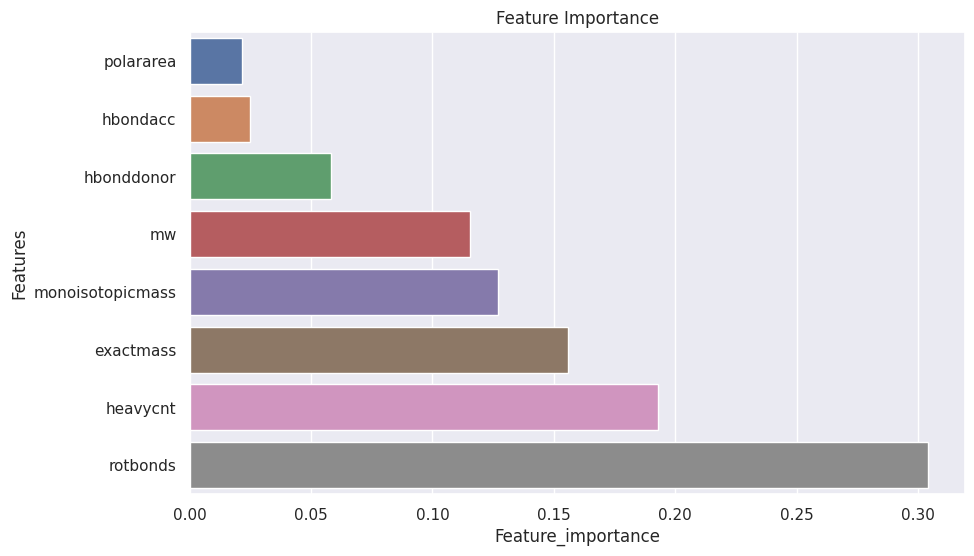

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

## Random Forest Regression with Sklearn - NEW

In [ ]:
df.shape

(21697, 9)

In [ ]:

df_FI = df.drop(['monoisotopicmass', 'mw','hbonddonor','hbondacc','polararea'], axis = 1)


In [ ]:
df_FI

,heavycnt,rotbonds,exactmass,xlogp
0,5,1,75.0684,-1.0
1,13,0,201.9780,2.3
2,4,1,97.9690,1.5
3,9,0,179.9300,4.0
4,11,1,154.0270,1.2
...,...,...,...,...
22032,73,11,1029.6000,5.6
22033,59,11,842.5140,2.1
22035,31,7,432.1780,2.3
22036,52,8,749.2920,4.8


In [ ]:
y_new = df_FI['xlogp']
X_new = df_FI.drop('xlogp', axis = 1)# becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=rand_state)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)


RandomForestRegressor(random_state=1000)

In [ ]:
# Predicting the Test set results po
y_hat = RF_regression.predict(X_test)

predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
2018,3.8,2.577000
8074,19.8,19.884310
14797,24.6,24.867092
809,0.1,2.768667
15454,20.7,20.852640


Mean Squared Error (MSE): 1.2054981759901957
Mean Absolute Error (MAE): 0.4831956140977363
R-squared (R2) Score: 0.9889887212967388
Explained Variance Score: 0.9889917982169955



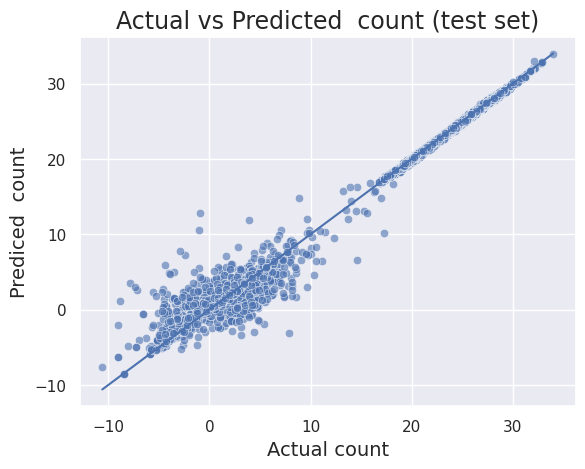

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the models
model = [
    ('Random Forest', RandomForestRegressor())
]
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)

# Displaying evaluation metric results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

---
---

## Does more important feature mean more significant?

In [ ]:
import statsmodels.api as sm

In [ ]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [ ]:
# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

In [ ]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  xlogp   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.195e+05
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:26:20   Log-Likelihood:                -32829.
No. Observations:               15187   AIC:                         6.567e+04
Df Residuals:                   15183   BIC:                         6.570e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7225      0.046     15.642      0.000       0.632       0.813
heavycnt      -0.0850      0.010     -8.847      0.000      -0.104      -0.066
rotbonds       0.4656      0.002    204.488      0.000       0.461       0.470
exactmass      0.0028      0.001      4.074      0.000       0.001       0.004
==============================================================================
Omnibus:                     6653.054   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109035.244
Skew:                          -1.680   Prob(JB):                         0.00
Kurtosis:                      15.689   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py